#   Dataset - Titanic Data         

Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board 
the Titanic. 

#  Questions              

1. Are the following factors significiant to survival? sex, pclass, age, sibsp, parch, fare, cabin?
2. With each class, what are the significiant factor affecting survival? sex, age, sibsp, parch?
3. Cabin survival rate in descending order, where are those top 10 cabin?
4. Are sibsp significiant factor in survival?
5. For parent with children, motivation or burdon to survive?
6. Average fare and standard deviation for different class?
7. How did young children under 14 fare in the disater?


## Import Libraries and Read Data File      

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as p
import math

df = pd.read_csv('./csv/titanic_data.csv', header=0)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S


## Data  Analysis         


### Make Numeric Gender Column

In [2]:
# make a gender column with 1 for male, 0 for female

df['Gender'] = df['Sex'].map( lambda x: x[0].upper() )

df['Gender'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender  
0      0         A/5 21171   7.2500   NaN        S       1  
1      0          PC 17599  71.2833   C85        C       0  
2      0  STON/O2. 3101282   7.9250   NaN        S       0  
3      0            113803  53.1000  C123        S       0  
4      0            373450   8.0500   NaN        S       1

### Cleaning up Missing Age
Replace null age with median age of passengers' own class median ages

In [3]:
# cleaning up missing age
# replace null age with median age of passengers' own class median ages

# median_ages by gender for different classes
median_ages = np.zeros((2, 3))
median_ages

for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i, j] = df[ (df['Gender'] == i) & (df['Pclass'] == j+1) ]['Age'].dropna().median()
       
median_ages

# make a copy of Age column
df['AgeFill'] = df['Age']
df.head()

# replace null age with class's median ages by gender
for i in range(0, 2):
    for j in range(0, 3):
        df.loc[ (df['Age'].isnull()) & (df['Gender'] == i) & (df['Pclass'] == j+1), 'AgeFill' ] = median_ages[i, j]

df[ df['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

# make a note column of original null age 
df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
df.head(5)

#df.describe()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender  AgeFill  AgeIsNull  
0      0         A/5 21171   7.2500   NaN        S       1     22.0          0  
1      0          PC 17599  71.2833   C85        C       0     38.0          0  
2      0  STON/O2. 3101282   7.9250   NaN        S       0     26.0          0  
3      0            113803  53.1000  C123        S       0     35.0          0  
4      0            373450   8.0500   NaN        S       1     35.0          0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Gender         891 non-null int64
AgeFill        891 non-null float64
AgeIsNull      891 non-null int64
dtypes: float64(3), int64(7), object(5)
memory usage: 104.5+ KB


### Gender Survival by Class

In [5]:
# gender_survival_by_pclass
#gender_survival_by_pclass = np.zeros((2, 3)) 
gender_survival_by_pclass = pd.DataFrame(0, index=[0, 1], columns=[1, 2, 3])
gender_count_by_pclass = pd.DataFrame(0, index=[0, 1], columns=[1, 2, 3])

for i in range(0,2): 
    for j in range(1, 4): 
        gender_survival_by_pclass.loc[i, j] = len(df[ (df['Gender'] == i) & (df['Pclass'] == j) & (df['Survived'] == 1)])
        gender_count_by_pclass.loc[i, j] = len(df[ (df['Gender'] == i) & (df['Pclass'] == j)])

gender_survival_by_pclass


1   2   3
0  91  70  72
1  45  17  47

In [6]:
gender_count_by_pclass

1    2    3
0   94   76  144
1  122  108  347

In [9]:
gender_survival_ratio_by_pclass = gender_survival_by_pclass / gender_count_by_pclass

gender_survival_ratio_by_pclass

1         2         3
0  0.968085  0.921053  0.500000
1  0.368852  0.157407  0.135447

For women 96% from 1st and 92% from 2nd class survived while 50% of 3rd class survived.  This could due to access to life boats. 

For men 36% from 1st class survived while around 14% from 2nd and 3rd class made it.  Men with money and social 
status had more means to survival.  Somehow they double their chance than ordinary men.  

### Survivors Age Distribution

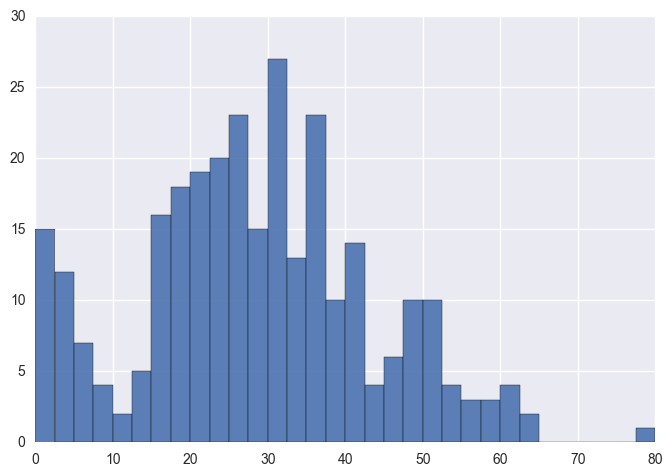

In [10]:
# Survivors' Age Distribution 
df[df['Survived'] == 1]['Age'].dropna().hist(bins=32, range=(0,80), alpha=.9)
p.show()

60% of 14 year old girls survived while boys of the same age did not.  Children of 15 years and up were treated as   
 adults. Girls were give priority to the life boats.  So 88% 16-years old girls survived vs. 11% boys of the same 
age. 

### Gender Survival by Age

In [11]:
# gender_survival_by_age 

gender_survival_by_age = pd.DataFrame(0, index=[0, 1], columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
gender_count_by_age = pd.DataFrame(0, index=[0,1], columns=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

for i in range(0,2): 
    for j in range(0, 10): 
        gender_survival_by_age.loc[i, j] = len(df[ (df['Gender'] == i) & ((df['AgeFill']/10).round() == j)  & (df['Survived'] == 1)] )
        gender_count_by_age.loc[i, j] = len(df[ (df['Gender'] == i) & ((df['AgeFill']/10).round() == j) ])

gender_survival_by_age


0  1   2   3   4   5  6  7  8  9
0  16  8  88  47  48  17  9  0  0  0
1  15  6  25  29  22   8  3  0  1  0

In [12]:
gender_count_by_age

0   1    2    3    4   5   6  7  8  9
0  21  18  125   60   60  20  10  0  0  0
1  23  16  234  129  102  41  24  7  1  0

In [13]:
gender_survival_ratio_by_age = gender_survival_by_age / gender_count_by_age
gender_survival_ratio_by_age

0         1         2         3         4         5      6    7  \
0  0.761905  0.444444  0.704000  0.783333  0.800000  0.850000  0.900  NaN   
1  0.652174  0.375000  0.106838  0.224806  0.215686  0.195122  0.125  0.0   

     8   9  
0  NaN NaN  
1  1.0 NaN

Overall, around 70% children under 10 survived. About 40% teenage made it. Girls had slight advantage over boys.

20% of men from other age group, such as 20s, 30s, 40s and 50s survived. Only 12% 60s+ men survived.  One eighty year old men survived.  For women, 70% of 20s, 78% and above of other age group ( 30s, 40s, 50s, 60s) survived. 
  

### Young Children Survival Statistics

In [15]:
# young_children_survival_by_class_by_age 

young_children_survival_by_class_by_age = pd.DataFrame(0, index=[1, 2, 3], columns=[0, 1, 2, 3, 4, 5, 6, 7, 8])
young_children_count_by_class_by_age = pd.DataFrame(0, index=[1, 2, 3], columns=[0, 1, 2, 3, 4, 5, 6, 7, 8])

for i in range(1, 4): 
    for j in range(0, 9): 
        young_children_survival_by_class_by_age.loc[i, j] = df[ (df['Pclass'] == i) & ((df['AgeFill']/2).round() == j) ]['Survived'].sum()
        young_children_count_by_class_by_age.loc[i, j] = len(df[ (df['Pclass'] == i) & ((df['AgeFill']/2).round() == j) ])

young_children_survival_by_class_by_age

0  1  2  3  4  5  6  7  8
1  1  0  1  0  0  0  1  1  7
2  5  2  6  1  3  0  1  1  2
3  6  1  9  1  2  0  2  1  7

In [ ]:
young_children_count_by_class_by_age

In [16]:
young_children_survival_by_class_by_age / young_children_count_by_class_by_age

0         1         2    3         4    5    6    7         8
1  1.00  0.000000  1.000000  NaN       NaN  NaN  1.0  1.0  1.000000
2  1.00  1.000000  1.000000  1.0  1.000000  NaN  1.0  1.0  0.500000
3  0.75  0.142857  0.692308  0.5  0.166667  0.0  0.4  0.2  0.291667

From the detail analysis of young children survival rate, all young children 14 and under from first and second class survived except one young girl from first class.  For third class, it was a tough call.  Babies tends to have best survival rate than their under-15 siblings because they were closed to mothers.  Toddlers around 2 to 3 has lowerest survival rate of around 14%.  Older children between 4 to 6 fared better. children of 6 and above survival rate is between 17 to 40% depending on chance. 

In [17]:
# children_survival_by_pclass and gender

children_survival_by_pclass_by_gender = pd.DataFrame(0, index=[0, 1], columns=[1, 2, 3])
children_count_by_pclass_by_gender  = pd.DataFrame(0, index=[0, 1], columns=[1, 2, 3])

for i in range(0,2): 
    for j in range(1, 4): 
        children_survival_by_pclass_by_gender.loc[i, j] = len(df[ ( df['AgeFill'] >= 0) & (df['AgeFill'] <= 14) & (df['Gender'] == i) & (df['Pclass'] == j) & (df['Survived'] == 1)])
        children_count_by_pclass_by_gender.loc[i, j] = len(df[ ( df['AgeFill'] >= 0) & (df['AgeFill'] <= 14) & (df['Gender'] == i) & (df['Pclass'] == j)])

children_survival_by_pclass_by_gender

1   2   3
0  1  10  13
1  3   9   9

In [18]:
children_count_by_pclass_by_gender

1   2   3
0  2  10  26
1  3   9  27

In [19]:
children_survival_ratio_by_pclass_by_gender = children_survival_by_pclass_by_gender / children_count_by_pclass_by_gender
children_survival_ratio_by_pclass_by_gender

1    2         3
0  0.5  1.0  0.500000
1  1.0  1.0  0.333333

Children 14 and under for first and second class all survived except for one young girl in first class.  For third class 50% girls made it while only 33% survived.

### Family Size in Relation to Survival

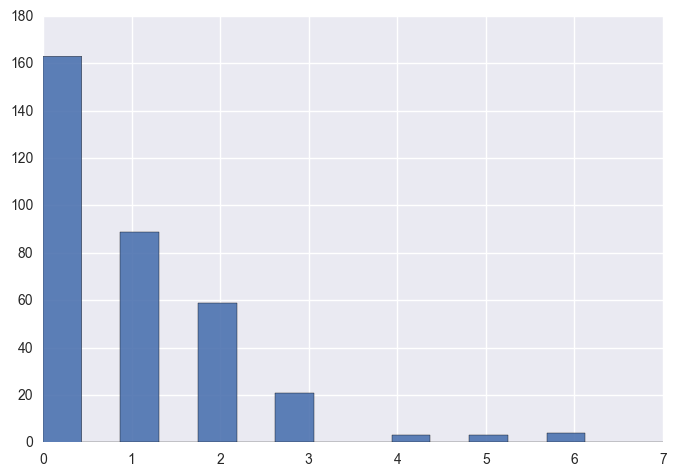

In [20]:
# Features Engineering
# Survival rate is negative corelated with family size.  Family includes siblings, spouse, parent and children. 
df['FamilySize'] = df['SibSp'] + df['Parch']
df[ df['Survived'] == 1 ]['FamilySize'].hist(bins=16, range=(0,7), alpha=.9)
p.show()

In [21]:
gender_survival_by_familySize = pd.DataFrame(0, index=[0, 1], columns=[0, 1, 2, 3, 4, 5, 6])
gender_count_by_familySize = pd.DataFrame(0, index=[0,1], columns=[0, 1, 2, 3, 4, 5, 6])

for i in range(0,2): 
    for j in range(0, 7): 
        gender_survival_by_familySize.loc[i, j] = len(df[ (df['Gender'] == i) & (df['FamilySize'] == j)  & (df['Survived'] == 1)] )
        gender_count_by_familySize.loc[i, j] = len(df[ (df['Gender'] == i) & (df['FamilySize'] == j) ])

gender_survival_by_familySize

0   1   2   3  4  5  6
0  99  71  38  16  3  3  3
1  64  18  21   5  0  0  1

In [22]:
# women and men general survival
women_survivors = len(df[ (df['Sex'] == 'female') & (df['Survived'] == 1) ])
women_total = len( df[(df['Sex'] == 'female')] )
men_survivors = len(df[ (df['Sex'] == 'male') & (df['Survived'] == 1) ])
men_total = len( df[(df['Sex'] == 'male')] )
print(1.0* women_survivors / women_total )
print(1.0 * men_survivors / men_total)


0.742038216561
0.188908145581


I construct a new column 'Family size' to include siblings, spouse, parent and children. It appears men and women fared better without family.  With one family member, both had average survival rate. With 2 and above family member, women's chance to survive decrease.  Men was still doing ok with 2 family member but not with 3 and plus.

## Conclusion       

Age is a big factor coorelating to survival for young children under 15 due to tough environment. For 15 and up, gender is the significiant factor toward survival in the disater of titanic. Passenger class is the second major factor related to survival.  This could attribute to access to life boats and message flow and response time lag. From the study about family size, which includes siblings, spouse, parent and children, it appears that survival rate is negative corelated with family size of 2 and above.  


## Notes:

Got inspiration from Kaggle site's tutorial:
Getting Started With Python II
Getting Started with Pandas: Kaggle's Titanic Competition
https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii
